# 1: Basics of Probability

In [1]:
import random


In [2]:
# Simulate tossing a coin 10,000 times
def coin_toss_simulation(n=10000):
    heads = 0
    for _ in range(n):
        if random.choice(['H', 'T']) == 'H':
            heads += 1
    tails = n - heads
    return heads/n, tails/n

# Run the simulation
heads_prob, tails_prob = coin_toss_simulation()
print(f"Experimental Probability of Heads: {heads_prob}")
print(f"Experimental Probability of Tails: {tails_prob}")


Experimental Probability of Heads: 0.5128
Experimental Probability of Tails: 0.4872


In [3]:
# Simulate rolling two dice and check probability of sum = 7
def dice_sum_simulation(n=10000):
    count_7 = 0
    for _ in range(n):
        dice_sum = random.randint(1, 6) + random.randint(1, 6)
        if dice_sum == 7:
            count_7 += 1
    return count_7 / n

# Run the simulation
prob_sum_7 = dice_sum_simulation()
print(f"Probability of getting a sum of 7: {prob_sum_7}")


Probability of getting a sum of 7: 0.1669



EXPLANATION

Cell 1 imports the random module, which is essential for simulating random events like coin tosses and dice rolls.

 Cell 2 defines and runs a simulation to toss a fair coin 10,000 times. It uses random.choice(['H', 'T']) to randomly pick heads or tails for each toss. The code counts how many times heads and tails occur, and calculates the experimental probabilities of both outcomes.

 Cell 3 simulates rolling two dice 10,000 times. For each trial, it generates two random integers between 1 and 6 using random.randint(1, 6), adds them, and checks if their sum is 7. It then calculates the probability of getting a sum of 7 based on how many times it occurred in all trials.



# 2: Estimate the Probability of Getting at Least One "6" in 10 Rolls of a Fair Die


In [4]:
import random


In [5]:
def estimate_probability_of_six(trials=10000):
    success_count = 0
    
    for _ in range(trials):
        found_six = False
        for _ in range(10):  # roll 10 times
            if random.randint(1, 6) == 6:
                found_six = True
                break
        if found_six:
            success_count += 1
    
    return success_count / trials

probability = estimate_probability_of_six()
print(f"Estimated Probability of getting at least one 6 in 10 rolls: {probability}")


Estimated Probability of getting at least one 6 in 10 rolls: 0.8389


Explanation:

We simulate 10 rolls of a die in each trial.

If at least one 6 appears, it's a successful trial.

We repeat this simulation (default: 10,000 trials).

Finally, we return the proportion of successful trials as the estimated probability.



# 3: Conditional Probability and Bayes’ Theorem

In [6]:
import random


In [7]:
def simulate_draws(trials=1000):
    bag = ['red'] * 5 + ['green'] * 7 + ['blue'] * 8
    draws = []

    for _ in range(trials):
        draws.append(random.choice(bag))
    
    return draws


In [8]:
def conditional_probability(draws):
    count_blue = 0
    count_red_given_blue = 0

    for i in range(1, len(draws)):
        if draws[i-1] == 'blue':
            count_blue += 1
            if draws[i] == 'red':
                count_red_given_blue += 1

    if count_blue == 0:
        return 0
    return count_red_given_blue / count_blue


In [9]:
draws = simulate_draws(1000)
prob_red_given_blue = conditional_probability(draws)
print(f"Estimated P(Red | Previous was Blue): {prob_red_given_blue}")


Estimated P(Red | Previous was Blue): 0.27918781725888325


In [10]:
# Total probabilities from bag
P_red = 5/20
P_blue = 8/20

# By symmetry and independence (with replacement), P(Red | Blue) ≈ P(Red)
print(f"Theoretical P(Red): {P_red}")


Theoretical P(Red): 0.25


# 4: Random Variables and Discrete Probability

In [11]:
import numpy as np


In [12]:
# Define the values and their probabilities
values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.40]

# Generate sample of size 1000
sample = np.random.choice(values, size=1000, p=probabilities)


In [13]:
mean = np.mean(sample)
variance = np.var(sample)
std_deviation = np.std(sample)

print(f"Empirical Mean: {mean}")
print(f"Empirical Variance: {variance}")
print(f"Empirical Standard Deviation: {std_deviation}")


Empirical Mean: 2.179
Empirical Variance: 0.624959
Empirical Standard Deviation: 0.7905434839400044


EXPLAMATION:

We use NumPy functions:

np.mean() to calculate the average of the sample.

np.var() to calculate the variance, which measures how spread out the values are.

np.std() to calculate the standard deviation, which is the square root of variance.



# 5: Continuous Random Variables

In [14]:
import numpy as np
import matplotlib.pyplot as plt


In [15]:
# Set mean (scale) to 5
mean = 5
sample_size = 2000

# Generate exponential samples
samples = np.random.exponential(scale=mean, size=sample_size)


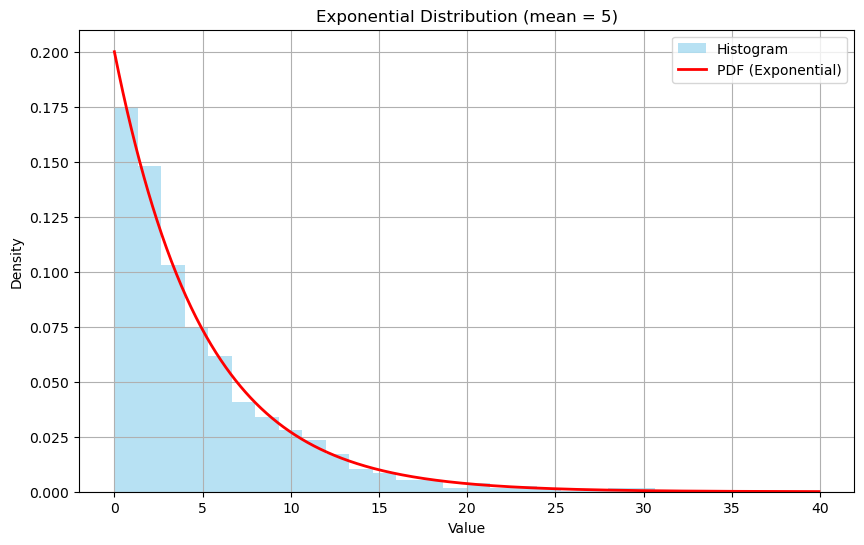

In [16]:
# Create histogram
plt.figure(figsize=(10, 6))
count, bins, _ = plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram')

# PDF overlay
x = np.linspace(0, max(samples), 1000)
pdf = (1/mean) * np.exp(-x / mean)
plt.plot(x, pdf, 'r-', label='PDF (Exponential)', linewidth=2)

# Labels and legend
plt.title("Exponential Distribution (mean = 5)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


# 6: Central Limit Theorem (CLT) Simulation

In [17]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
uniform_data = np.random.uniform(low=0.0, high=1.0, size=10000)

In [20]:
sample_means = []

# Draw 1000 samples of size 30
for _ in range(1000):
    sample = np.random.choice(uniform_data, size=30)
    sample_means.append(np.mean(sample))


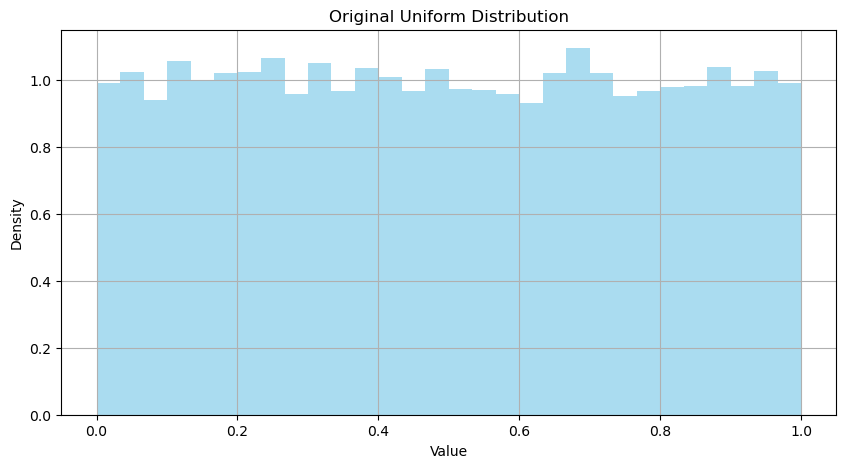

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(uniform_data, bins=30, density=True, alpha=0.7, color='skyblue')
plt.title("Original Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()


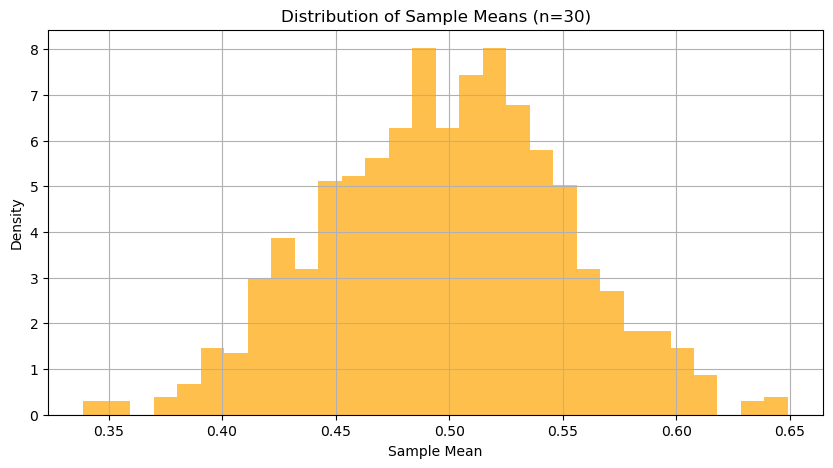

In [22]:
plt.figure(figsize=(10, 5))
plt.hist(sample_means, bins=30, density=True, alpha=0.7, color='orange')
plt.title("Distribution of Sample Means (n=30)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.grid(True)
plt.show()


In [ ]:
S